### KHAI BÁO THƯ VIỆN

In [513]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import StackingRegressor
# from sklearn.metrics import accuracy_score # Có thể bỏ vì không cần trong bài toán hồi quy
from linearTuCode import *  # Thư viện này cần đảm bảo đã được cài đặt
import matplotlib.pyplot as plt


### ĐỌC FILE DỮ LIỆU

In [498]:
data = pd.read_csv('Gold_Price.csv')
print(data.columns)
print(data.isnull().sum())  # Kiểm tra xem có hàng nào bị rỗng không
data = data.dropna()  # Loại bỏ các hàng có giá trị rỗng


Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Chg%'], dtype='object')
Date      0
Price     0
Open      0
High      0
Low       0
Volume    0
Chg%      0
dtype: int64


### CHIA THÀNH CÁC TẬP TRAIN VÀ TEST

In [499]:
dt_train,dt_test = train_test_split(data,test_size=0.3,shuffle=True)

X_train = dt_train.drop(['Date','Price'], axis = 1) 
y_train = dt_train['Price'] 
X_test= dt_test.drop(['Date','Price'], axis = 1)
y_test= dt_test['Price']

### LINEAR REGRESSION TỰ CODE

In [501]:
linearTuCode = LinearRegressionTuCode()
linearTuCode.fit(X_train,y_train)
y_pred = linearTuCode.predict(X_test)

# in ra kết quả đánh giá mô hình


r2_score_linearTuCode = r2_score(y_test, y_pred)
mae_linearTuCode = mean_absolute_error(y_test, y_pred)
rmse_linearTuCode = np.sqrt(mean_squared_error(y_test, y_pred))


print('R2 scoree: ', r2_score(y_test, y_pred))
print('MAE scoree: ', mean_absolute_error(y_test, y_pred))
print('RMSEE: ', np.sqrt(mean_squared_error(y_test, y_pred)))



R2 scoree:  0.9998629115063251
MAE scoree:  65.02064444352362
RMSEE:  104.01568245167225


### LINEAR REGRESSION

In [503]:
reg = LinearRegression(fit_intercept=False).fit(X_train,y_train)
#de ko di qua goc toa do de + hang so b
y_predict = reg.predict(X_test)
y_test = np.array(y_test)

print("Thuc te\t\tDu doan\t\tChenh lech")
for i in range(0,len(y_test)):
    print(" ",y_test[i],"\t",y_predict[i],"\t", abs(y_test[i]-y_predict[i]))


r2_score_linear = r2_score(y_test,y_predict)
MAE_linear = mean_absolute_error(y_test,y_predict)
RMSE_linear = np.sqrt(mean_squared_error(y_test,y_predict))

print("\nR2 LinearRegression :",r2_score(y_test,y_predict))

print("MAE LinearRegression :",mean_absolute_error(y_test,y_predict))
print("RMSE LinearRegression :",np.sqrt(mean_squared_error(y_test,y_predict)))


Thuc te		Du doan		Chenh lech
  47072 	 47005.75837053859 	 66.24162946140859
  30286 	 30169.37744402197 	 116.62255597802869
  51274 	 51240.4424811153 	 33.557518884699675
  25256 	 25223.39252861448 	 32.6074713855196
  28626 	 28639.39979183884 	 13.399791838841338
  29789 	 29757.110448405347 	 31.889551594653312
  31194 	 31183.653251021213 	 10.346748978787218
  47502 	 47490.65387528109 	 11.346124718911597
  30262 	 30206.01438570339 	 55.98561429660913
  51442 	 51428.70905893153 	 13.29094106847333
  48717 	 48839.37274580102 	 122.37274580101803
  26965 	 27031.306668128946 	 66.3066681289456
  30839 	 30835.264837612645 	 3.7351623873546487
  28440 	 28388.397521053863 	 51.602478946137126
  47993 	 47953.16940508936 	 39.83059491064341
  25689 	 25713.099247748458 	 24.099247748457856
  29185 	 29167.88903424443 	 17.11096575557167
  26468 	 26497.187788107058 	 29.187788107057713
  29806 	 29790.738168541706 	 15.261831458294182
  26458 	 26448.112484954872 	 9.887515045

### LASSO

In [504]:
lasso = Lasso(alpha= 0.2 ,max_iter=1000,tol=0.01).fit(X_train,y_train)
#
y_predict = lasso.predict(X_test)
y_test = np.array(y_test)

print("Thuc te\t\tDu doan\t\tChenh lech")
for i in range(0,len(y_test)):
    print(" ",y_test[i],"\t",y_predict[i],"\t", abs(y_test[i]-y_predict[i]))

# in ra kết quả đánh giá mô hình


r2_score_lasso = r2_score(y_test,y_predict)

MAE_lasso = mean_absolute_error(y_test,y_predict)
RMSE_lasso = np.sqrt(mean_squared_error(y_test,y_predict))


print("\nR2 Lasso :",r2_score(y_test,y_predict))
print("MAE Lasso :",mean_absolute_error(y_test,y_predict))
print("RMSE Lasso :",np.sqrt(mean_squared_error(y_test,y_predict)))

Thuc te		Du doan		Chenh lech
  47072 	 47070.680809734054 	 1.3191902659455081
  30286 	 30256.444665501323 	 29.55533449867653
  51274 	 51179.97221109239 	 94.02778890760965
  25256 	 25150.84062659723 	 105.15937340277014
  28626 	 28532.562735023967 	 93.43726497603348
  29789 	 29797.255653961074 	 8.255653961074131
  31194 	 31112.18780855949 	 81.8121914405092
  47502 	 47457.730029011 	 44.269970989000285
  30262 	 30205.84153660784 	 56.15846339215932
  51442 	 51432.818107333536 	 9.181892666463682
  48717 	 48836.285609081926 	 119.28560908192594
  26965 	 27063.48922428823 	 98.48922428823062
  30839 	 30795.71793722194 	 43.28206277806021
  28440 	 28439.647364735756 	 0.35263526424387237
  47993 	 47916.569581366086 	 76.43041863391409
  25689 	 25671.725012155686 	 17.274987844313728
  29185 	 29159.90846644317 	 25.091533556831564
  26468 	 26510.064028733876 	 42.0640287338756
  29806 	 29747.846868241802 	 58.15313175819756
  26458 	 26427.03676809119 	 30.96323190880

### NEURAL NETWORK

In [505]:
# MLP

mlp = MLPRegressor(hidden_layer_sizes=(100,100,100),activation='relu',solver='adam',max_iter=1000).fit(X_train,y_train)

y_predict = mlp.predict(X_test)
y_test = np.array(y_test)

print("Thuc te\t\tDu doan\t\tChenh lech")
for i in range(0,len(y_test)):
    print(" ",y_test[i],"\t",y_predict[i],"\t", abs(y_test[i]-y_predict[i]))

# in ra kết quả đánh giá mô hình
r2_score_mlp = r2_score(y_test,y_predict)
MAE_mlp = mean_absolute_error(y_test,y_predict)
RMSE_mlp = np.sqrt(mean_squared_error(y_test,y_predict))

print("\nR2 NeuralNetwork :",r2_score(y_test,y_predict))
print("MAE NeuralNetwork :",mean_absolute_error(y_test,y_predict))
print("RMSE NeuralNetwork :",np.sqrt(mean_squared_error(y_test,y_predict)))


Thuc te		Du doan		Chenh lech
  47072 	 46962.99040850266 	 109.00959149734263
  30286 	 30230.60726857251 	 55.392731427491526
  51274 	 51059.07202536788 	 214.927974632119
  25256 	 25386.69196552093 	 130.69196552093126
  28626 	 28617.676084850653 	 8.323915149347158
  29789 	 29581.849127628473 	 207.15087237152693
  31194 	 31293.817946900563 	 99.81794690056267
  47502 	 47588.336543971665 	 86.33654397166538
  30262 	 30239.20169741877 	 22.7983025812282
  51442 	 51470.42440137069 	 28.424401370692067
  48717 	 48904.759791931756 	 187.7597919317559
  26965 	 26776.95926949503 	 188.04073050497027
  30839 	 30816.772617541534 	 22.22738245846631
  28440 	 28399.328724803927 	 40.67127519607311
  47993 	 47868.630416097585 	 124.36958390241489
  25689 	 25808.02641235088 	 119.02641235087867
  29185 	 29295.20851530256 	 110.20851530255823
  26468 	 26475.97321938408 	 7.97321938407913
  29806 	 29754.59940005508 	 51.40059994491821
  26458 	 26640.2912556676 	 182.291255667598

### STACKING 

In [506]:
from collections import Counter
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neural_network import MLPRegressor
import numpy as np

class StackingRegressorCustom:
    def __init__(self, model1=LinearRegression(fit_intercept=False), model2=Lasso(alpha=1.0, max_iter=1000, tol=0.01),
                 model3=MLPRegressor(hidden_layer_sizes=(100, 100, 100), activation='relu', solver='adam', max_iter=1000),
                 final_estimator=LinearRegression(), cv=5, passthrough=True, n_jobs=-1):
        self.model1 = model1
        self.model2 = model2
        self.model3 = model3
        self.final_estimator = final_estimator
        self.cv = cv
        self.passthrough = passthrough
        self.n_jobs = n_jobs
        self.stacked_model = StackingRegressor(
            estimators=[('model1', model1), ('model2', model2), ('model3', model3)],
            final_estimator=final_estimator,
            cv=cv,
            passthrough=passthrough,
            n_jobs=n_jobs
        )

    def fit(self, X_train, y_train):
        self.model1.fit(X_train, y_train)
        self.model2.fit(X_train, y_train)
        self.model3.fit(X_train, y_train)
        self.stacked_model.fit(X_train, y_train)

    def vote(self, X_test):
        y_pred1 = self.model1.predict(X_test)
        y_pred2 = self.model2.predict(X_test)
        y_pred3 = self.model3.predict(X_test)
        y_pred_stacked = self.stacked_model.predict(X_test)
        # use counter to find the most common value
        y_pred = []
        for i in range(len(y_pred1)):
            y_pred.append(Counter([y_pred1[i], y_pred2[i], y_pred3[i], y_pred_stacked[i]]).most_common(1)[0][0])
        return y_pred

    def predict(self, X_test):
        y_pred1 = self.model1.predict(X_test)
        y_pred2 = self.model2.predict(X_test)
        y_pred3 = self.model3.predict(X_test)
        y_pred_stacked = self.vote(X_test)
        return y_pred_stacked
    
    

# Sử dụng class StackingRegressorCustom
stacked_classifier = StackingRegressorCustom(cv=10)
stacked_classifier.fit(X_train, y_train)
y_predict_stacked = stacked_classifier.predict(X_test)

r2_score_stacked = r2_score(y_test,y_predict_stacked)
MAE_stacked = mean_absolute_error(y_test,y_predict_stacked)
RMSE_stacked = np.sqrt(mean_squared_error(y_test,y_predict_stacked))

print("r2_score of StackingRegressorCustom :",r2_score(y_test,y_predict_stacked))
print("MAE of StackingRegressorCustom :",mean_absolute_error(y_test,y_predict_stacked))
print("RMSE of StackingRegressorCustom :",np.sqrt(mean_squared_error(y_test,y_predict_stacked)))


r2_score of StackingRegressorCustom : 0.9998626519671906
MAE of StackingRegressorCustom : 65.06121754129778
RMSE of StackingRegressorCustom : 104.1140983512282


### VẼ BIỂU ĐỒ SO SÁNH CÁC ĐỘ ĐO

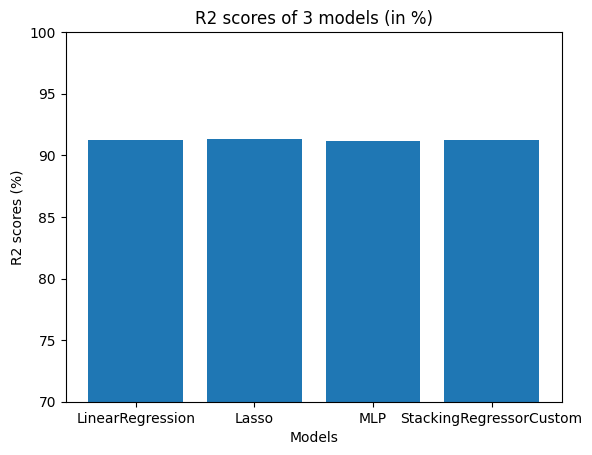

In [507]:
# Chuyển R² thành phần trăm
r2_scores_percent = [score * 100 for score in r2_scores]

# Vẽ biểu đồ
plt.bar(labels, r2_scores_percent)
plt.title('R2 scores of 4 models (in %)')
plt.xlabel('Models')
plt.ylabel('R2 scores (%)')
plt.ylim(70, 100)  # Đặt giới hạn trục Y từ 70% đến 100%
plt.show()

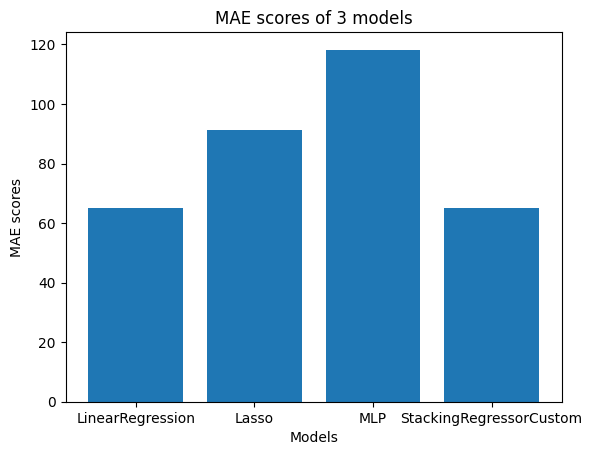

In [509]:
# vẽ biểu đồ cột so sánh độ đo MAE của 4 mô hình: LinearRegression, Lasso, MLP, StackingRegressorCustom
MAE_scores = [MAE_linear,MAE_lasso,MAE_mlp,MAE_stacked]
labels = ['LinearRegression','Lasso','MLP','StackingRegressorCustom']
plt.bar(labels,MAE_scores)
plt.title('MAE scores of 4 models')
plt.xlabel('Models')
plt.ylabel('MAE scores')
plt.show()


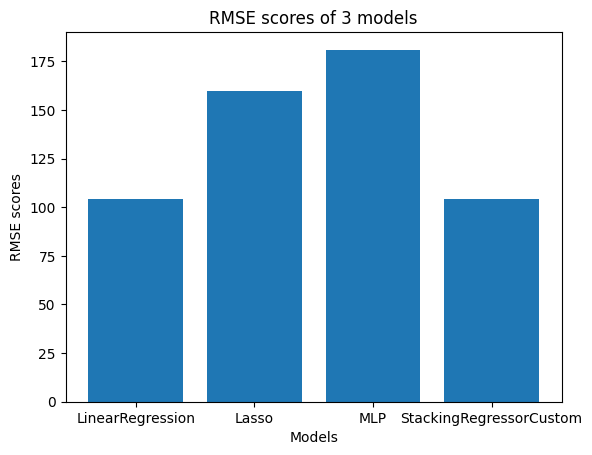

In [512]:
# vẽ biểu đồ cột so sánh độ đo RMSE của 4 mô hình: LinearRegression, Lasso, MLP, StackingRegressorCustom
RMSE_scores = [RMSE_linear,RMSE_lasso,RMSE_mlp,RMSE_stacked]
labels = ['LinearRegression','Lasso','MLP','StackingRegressorCustom']
plt.bar(labels,RMSE_scores)
plt.title('RMSE scores of 4 models')
plt.xlabel('Models')
plt.ylabel('RMSE scores')
plt.show()
